# **Stock Price Prediction and Analysis using different Regression models**

In [165]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta

%matplotlib inline

In [166]:
# The historical data of stock prices of Apple was downloaded from Yahoo! Finance Website in the .csv format
# Website - https://finance.yahoo.com/quote/AAPL/history?p=AAPL

# Reading the CSV file

df = pd.read_excel('data_prepocessed/隆基绿能_601012_成长.xlsx', engine="openpyxl")
code = '601012'
df.rename(columns={'Unnamed: 0' : 'Date'}, inplace=True)
df.set_index('Date', inplace=True)
df.tail()

,股价,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),...,宏观_PPI,宏观_出口价格指数(总),宏观_出口价格指数(车船航),宏观_进口价格指数(总),宏观_进口价格指数(车船航),宏观_固定资产投资完成额,宏观_社会消费品零售总额,宏观_M2,宏观_金融机构各项贷款余额,宏观_社会融资规模
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-25,44.59,0.240129,0.236936,0.197998,0.225023,0.188859,1.085309,0.406382,-1.095481,-1.203497,...,-1.3,115.3,115.4,110.9,101.0,5.8,-0.5,11.8,11.1,9079.0
2022-11-28,44.96,0.189538,0.140493,0.127385,0.165378,0.148234,0.825445,0.243243,-0.887216,-1.009035,...,-1.3,115.3,115.4,110.9,101.0,5.8,-0.5,11.8,11.1,9079.0
2022-11-29,45.78,0.148924,0.150851,0.144081,0.177819,0.161419,0.718180,0.203773,0.235929,0.236412,...,-1.3,115.3,115.4,110.9,101.0,5.8,-0.5,11.8,11.1,9079.0
2022-11-30,47.01,0.162106,0.164068,0.155560,0.189163,0.190640,0.782839,0.246236,0.570641,0.608992,...,-1.3,115.3,115.4,110.9,101.0,5.8,-0.5,11.8,11.1,9079.0
2022-12-01,47.98,0.191320,0.219433,0.215391,0.256126,0.234472,1.829511,0.809343,0.875601,0.932470,...,-1.3,115.3,115.4,110.9,101.0,5.8,-0.5,11.8,11.1,9079.0


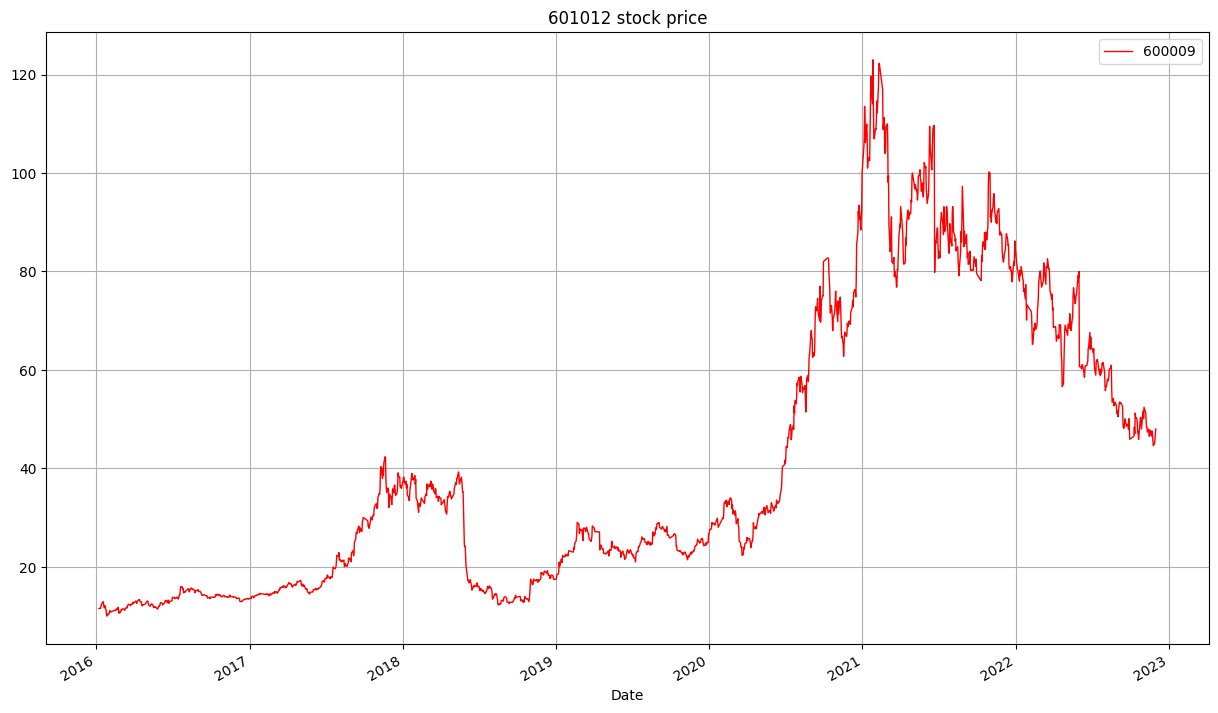

In [167]:
# Visualizing the stock prices

df['股价'].plot(label='600009', figsize=(15, 9), title=f'{code} stock price', color='red', linewidth=1.0, grid=True)
plt.legend()

In [168]:
# Rolling Mean / Moving Average to remove the noise in the graph and smoothen it

close_col = df['股价']
mvag = close_col.rolling(window=100).mean()     # Taking an average over the window size of 100.
# Increasing the window size can make it more smoother, but less informative and vice-versa.

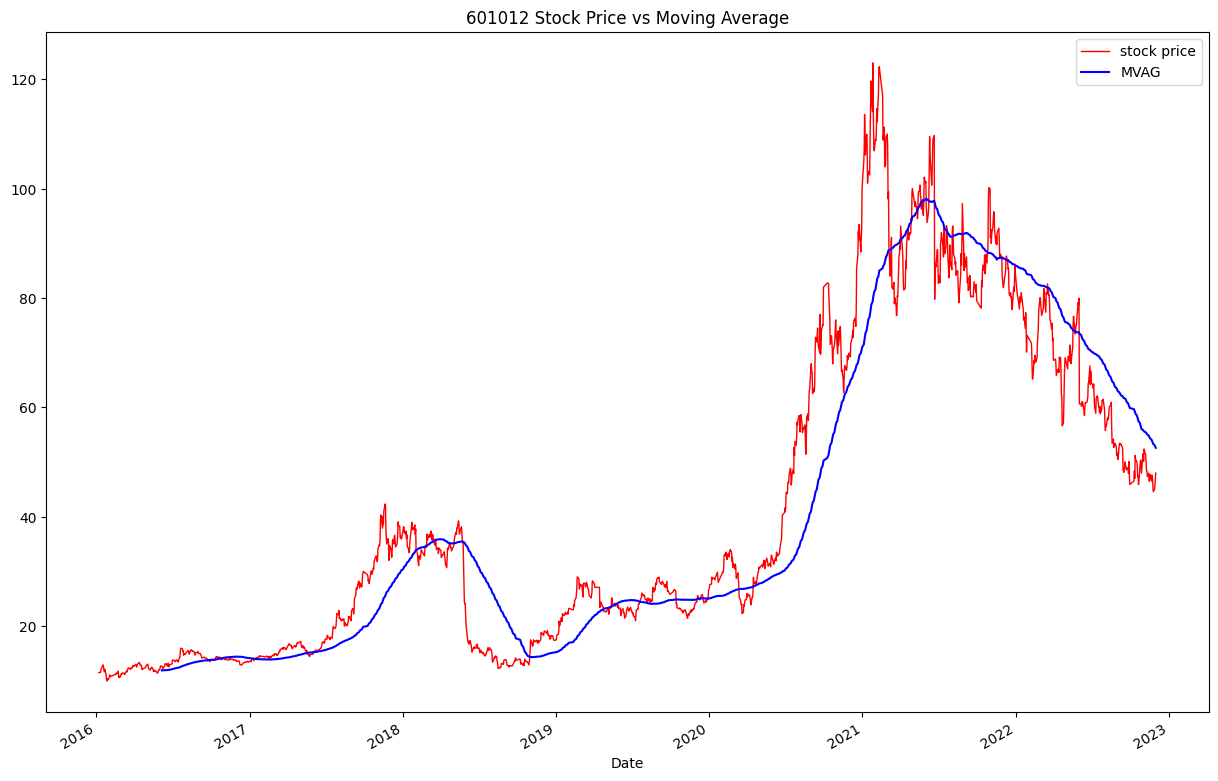

In [169]:
# Visualizing Rolling Mean and Adjusted Closing Price together

df['股价'].plot(label='stock price', figsize=(15,10), title=f'{code} Stock Price vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

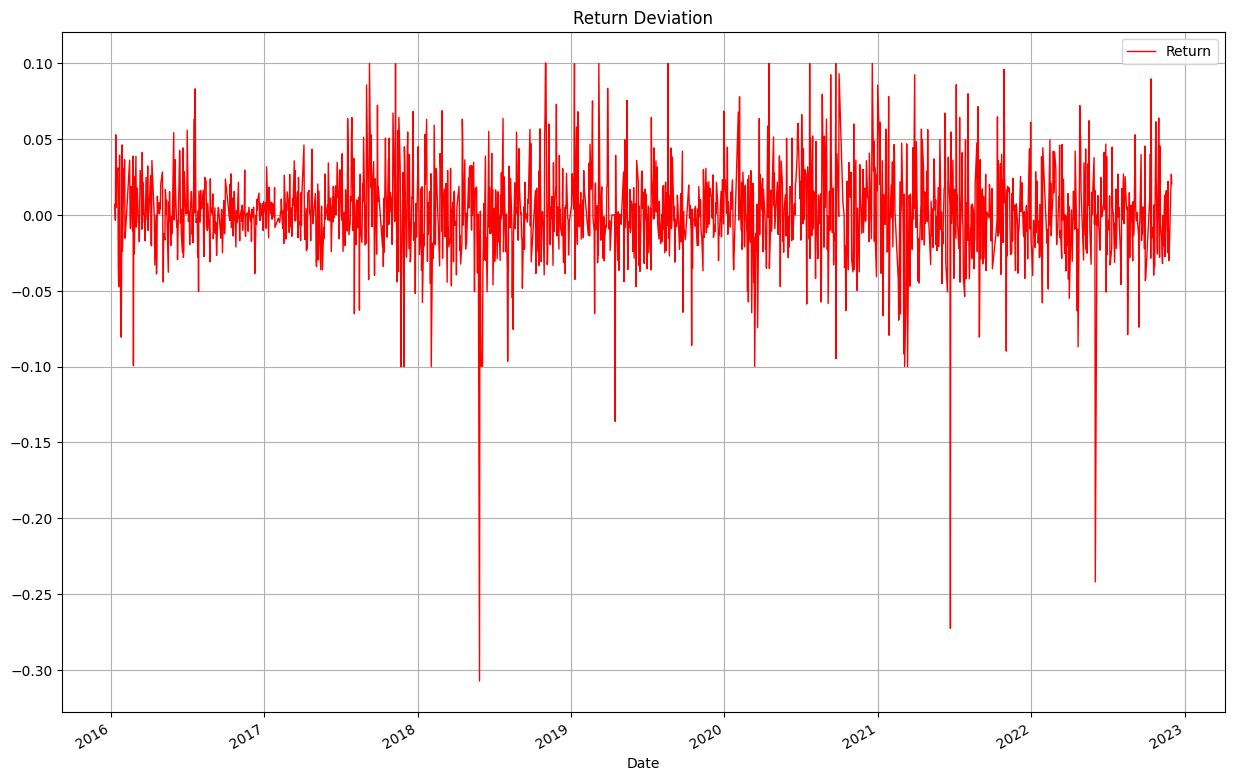

In [170]:
# Return Deviation measures the Mean of the Probability Distribution of Investment Returns if it has a positive/negative Average Net Outcome

rd = close_col / close_col.shift(1) - 1
rd.plot(label='Return', figsize=(15, 10), title='Return Deviation', color='red', linewidth=1.0, grid=True)
plt.legend()

In [171]:
df_X = df.drop(['股价'], axis = 1)
df_X.head()

,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),...,宏观_PPI,宏观_出口价格指数(总),宏观_出口价格指数(车船航),宏观_进口价格指数(总),宏观_进口价格指数(车船航),宏观_固定资产投资完成额,宏观_社会消费品零售总额,宏观_M2,宏观_金融机构各项贷款余额,宏观_社会融资规模
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-08,-1.021028,-1.021075,-1.001387,-1.024596,-0.998525,0.798042,-0.571500,0.726840,2.352066,-1.005988,...,-5.3,93.9,99.3,86.9,102.1,0.0,0.0,14.0,15.3,34758.0
2016-01-11,-0.997550,-1.010037,-1.005909,-1.026335,-1.022009,-0.476453,-0.739681,-0.723579,-2.226667,-1.015347,...,-5.3,93.9,99.3,86.9,102.1,0.0,0.0,14.0,15.3,34758.0
2016-01-12,-1.021028,-1.020396,-1.015283,-1.026335,-1.022009,-0.634345,-0.763172,0.020225,0.186372,-1.022220,...,-5.3,93.9,99.3,86.9,102.1,0.0,0.0,14.0,15.3,34758.0
2016-01-13,-1.021028,-1.021075,-1.014605,-1.026335,-1.022009,-0.834770,-0.786345,-0.069031,-0.204201,-1.021073,...,-5.3,93.9,99.3,86.9,102.1,0.0,0.0,14.0,15.3,34758.0
2016-01-14,-1.021028,-1.021075,-1.012170,-1.026335,-1.008147,-0.332821,-0.723149,0.414442,1.908414,-1.019998,...,-5.3,93.9,99.3,86.9,102.1,0.0,0.0,14.0,15.3,34758.0


In [172]:
df_Y = df['股价']
df_Y.head()

Date
2016-01-08    11.49
2016-01-11    11.57
2016-01-12    11.53
2016-01-13    12.14
2016-01-14    12.20
Name: 股价, dtype: float64

In [173]:
X_train = np.array(df_X[df_X.index < datetime(2022, 1, 1)])
X_test = np.array(df_X[df_X.index >= datetime(2022, 1, 1)])

In [174]:
y_train = np.array(df_Y[df_Y.index < datetime(2022, 1, 1)])
y_test = np.array(df_Y[df_Y.index >= datetime(2022, 1, 1)])

In [175]:
# Splitting the data into Training data & Testing data

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      #Splitting the data into 80% for training & 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1457, 49)
(1457,)
(221, 49)
(221,)


In [176]:
display_at = 1457

## 1. Linear Regression
Building First model of regression - Linear Regression

In [177]:
# Defining the Linear Regression Model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)      # Training the algorithm

LinearRegression()

In [178]:
# Score of the Linear Regression Model (Using the Test Data)

linear_model_score = linear_model.score(X_test, y_test)
print('Linear Model score:', linear_model_score)

Linear Model score: 0.8930428247638548


In [179]:
# Define the Real & Prediction Values

X_predict = np.array(df.drop(['股价'], 1))

linear_model_predict_prediction = linear_model.predict(X_predict)
linear_model_real_prediction = linear_model.predict(np.array(df.drop(['股价'], 1)))

C:\Users\AnnaMa\AppData\Local\Temp\ipykernel_21476\2579810041.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_predict = np.array(df.drop(['股价'], 1))
C:\Users\AnnaMa\AppData\Local\Temp\ipykernel_21476\2579810041.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  linear_model_real_prediction = linear_model.predict(np.array(df.drop(['股价'], 1)))


In [180]:
# Defining some Parameters

predicted_dates = []
recent_date = df.index.max()
alpha = 0.5

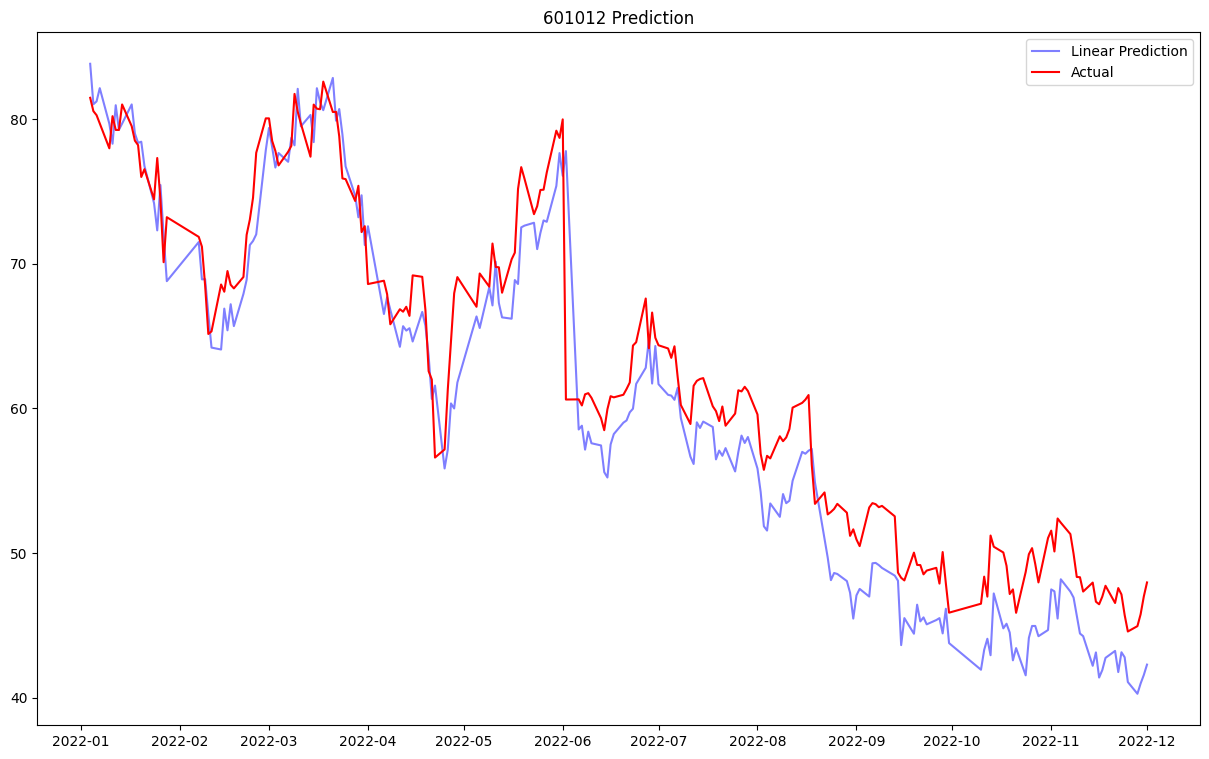

In [181]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.title(f"{code} Prediction")
plt.plot(df.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Prediction', color='blue', alpha=alpha)
# plt.plot(predicted_dates, linear_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['股价'][display_at:], label='Actual', color='red')
plt.legend()
plt.savefig(f"price_plot/{code}LinearRegression.png")

## 2. Ridge Regression
Building Second model of regression - Ridge Regression

In [182]:
# Defining the Ridge Regression Model

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)     # Training the algorithm

Ridge()

In [183]:
# Score of the Ridge Regression Model (Using the Test Data)

ridge_model_score = ridge_model.score(X_test, y_test)
print('Ridge Model score:', ridge_model_score)

Ridge Model score: 0.9088035150290202


In [184]:
# Define the Real & Prediction Values

# ridge_model_predict_prediction = ridge_model.predict(X_predict)
ridge_model_real_prediction = ridge_model.predict(np.array(df.drop(['股价'], 1)))

C:\Users\AnnaMa\AppData\Local\Temp\ipykernel_21476\2181718546.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ridge_model_real_prediction = ridge_model.predict(np.array(df.drop(['股价'], 1)))


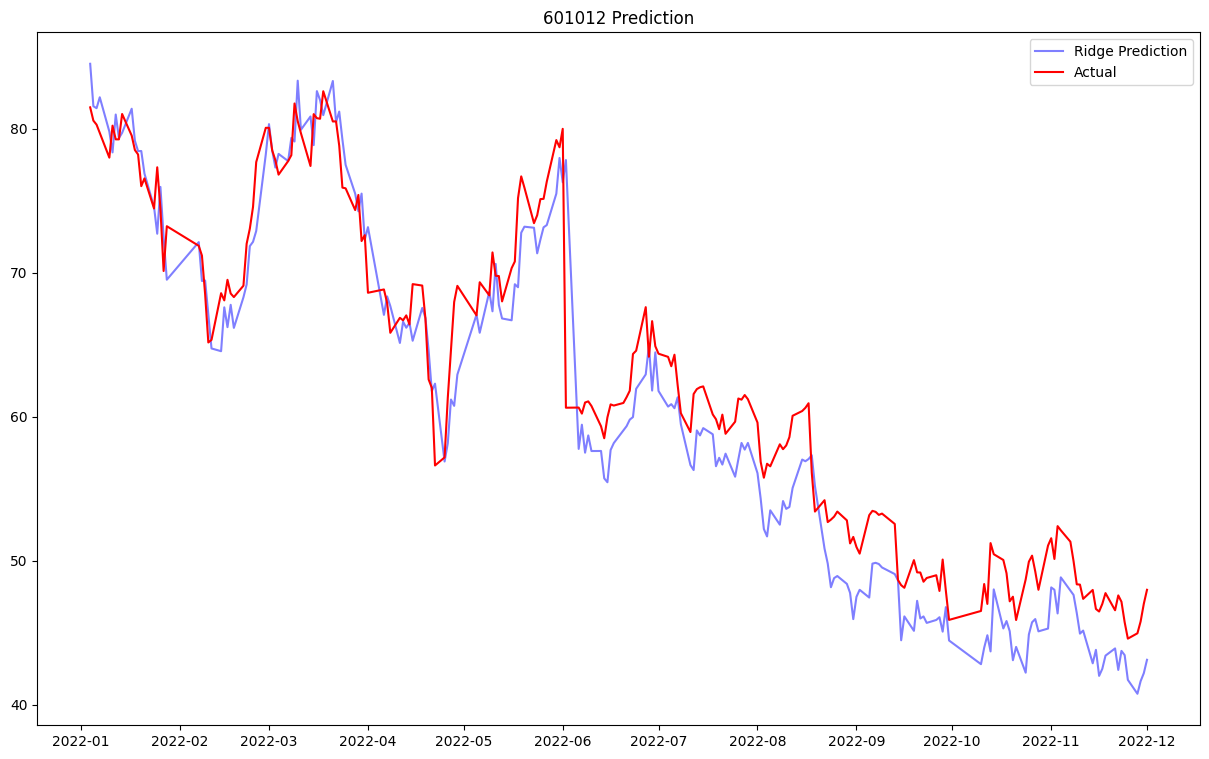

In [185]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.title(f"{code} Prediction")
plt.plot(df.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Prediction', color='blue', alpha=alpha)
# plt.plot(predicted_dates, ridge_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['股价'][display_at:], label='Actual', color='red')
plt.legend()
plt.savefig(f"price_plot/{code}RidgeRegression.png")

## 3. Lasso Regression
Building Third model of regression - Lasso Regression

In [186]:
# Defining the Lasso Regression Model

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)     # Training the algorithm

C:\Users\AnnaMa\Desktop\repo\Fintech\Final Project\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.770e+02, tolerance: 1.215e+02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [187]:
# Score of the Lasso Regression Model (Using the Test Data)

lasso_model_score = lasso_model.score(X_test, y_test)
print('Lasso Model score:', lasso_model_score)

Lasso Model score: 0.960545611059823


In [188]:
# Define the Real & Prediction Values

# lasso_model_predict_prediction = lasso_model.predict(X_predict)
lasso_model_real_prediction = lasso_model.predict(np.array(df.drop(['股价'], 1)))

C:\Users\AnnaMa\AppData\Local\Temp\ipykernel_21476\938273651.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lasso_model_real_prediction = lasso_model.predict(np.array(df.drop(['股价'], 1)))


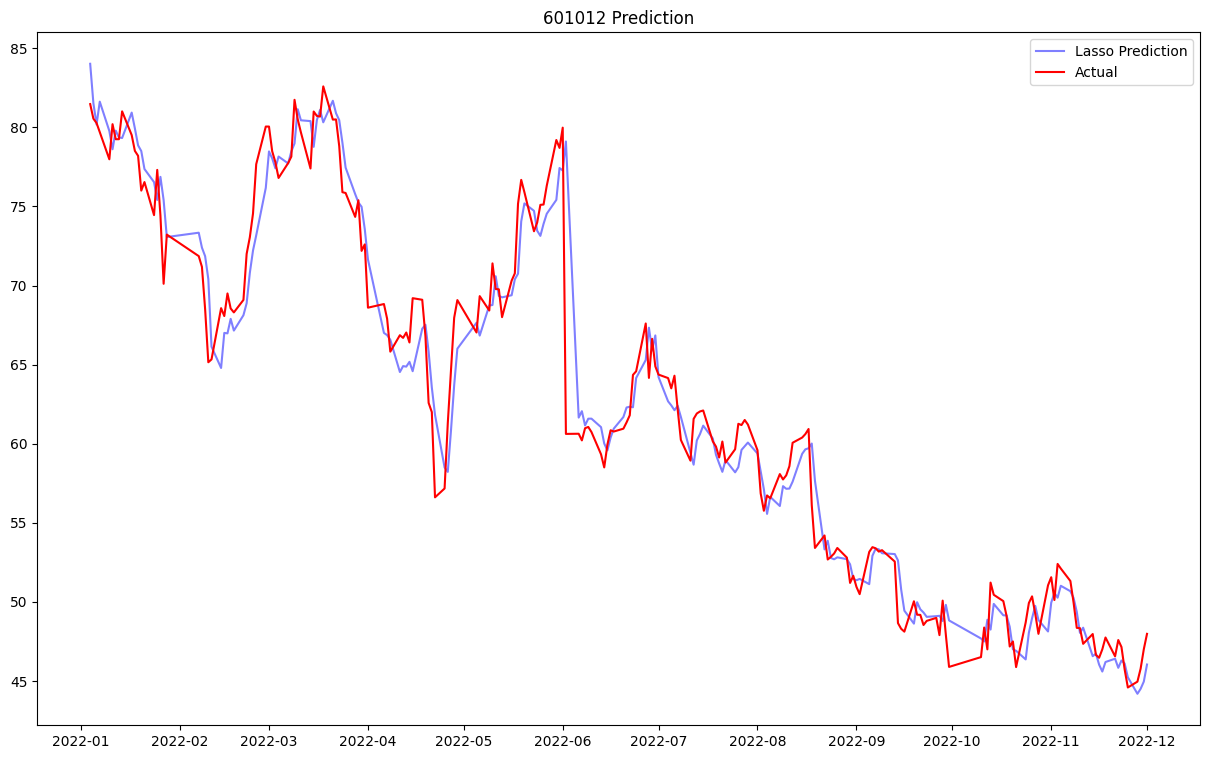

In [189]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.title(f"{code} Prediction")
plt.plot(df.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Prediction', c='blue', alpha=alpha)
# plt.plot(predicted_dates, lasso_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['股价'][display_at:], label='Actual', color='red')
plt.legend()
plt.savefig(f"price_plot/{code}LassoRegression.png")

In [190]:
# Best Performance of the Regressor Models

best_score = max(linear_model_score, ridge_model_score, lasso_model_score)
index = np.argmax([linear_model_score, ridge_model_score, lasso_model_score])
best_regressor = {0:'Linear Regression Model',
                  1:'Ridge Model',
                  2:'Lasso Model'}
print("The Best Performer is {0} with the score of {1}%.".format(best_regressor[index], best_score*100))

The Best Performer is Lasso Model with the score of 96.05456110598229%.
